In [17]:
import numpy as np
import pandas as pd
from math import fabs


In [2]:
from functools import reduce

In [16]:
df = pd.read_json('spacex.json', lines=True)
df

,time,velocity-stage1,altitude-stage1,velocity-stage2,altitude-stage2
0,0.033,0.277,0.0,0.000,0.0
1,0.066,0.277,0.0,0.000,0.0
2,0.100,0.277,0.0,0.000,0.0
3,0.133,0.555,0.0,0.000,0.0
4,0.166,0.833,0.0,0.000,0.0
...,...,...,...,...,...
14360,533.200,0.000,0.0,7548.888,168.0
14361,533.233,0.000,0.0,7550.000,168.0
14362,533.266,0.000,0.0,7551.111,168.0
14363,533.300,0.000,0.0,7551.944,168.0


In [ ]:
def check_data(prev_velocity, prev_time, cur_velocity, cur_time, prev_alt, cur_alt):
    return prev_time == cur_time or \
           fabs((cur_velocity - prev_velocity) / (cur_time - prev_time)) < 84 and \
           fabs((cur_alt - prev_alt) / (cur_time - prev_time)) < 200 and \
           (fabs(cur_alt - prev_alt) < 8 or cur_time - prev_time > 10)

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 9]

In [47]:
cleaned = df[df['velocity-stage2'] < 8000]
cleaned = cleaned.query("time <= 200 or time > 200 and `velocity-stage2` > 2000 and `altitude-stage2` < 750")

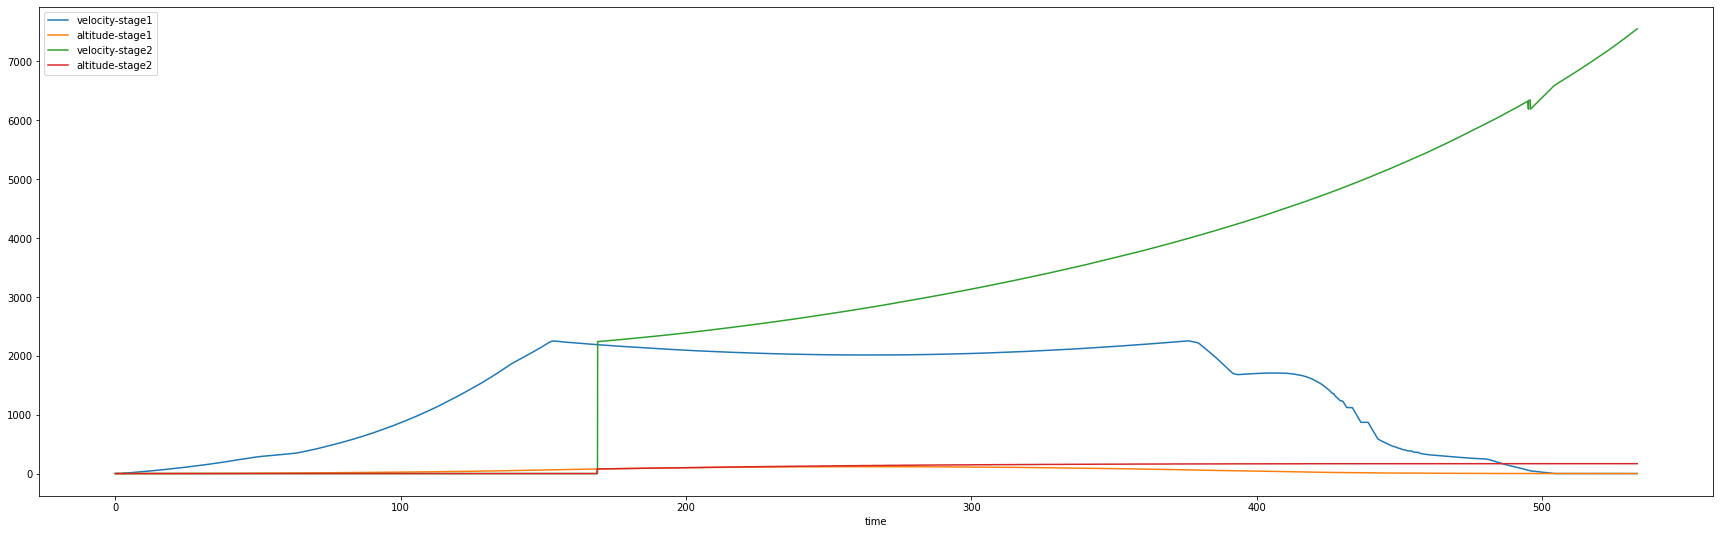

In [48]:
ax = cleaned.plot(x='time', y='velocity-stage1')
cleaned.plot(x='time', y="altitude-stage1", ax=ax)
cleaned.plot(x='time', y="velocity-stage2", ax=ax)
cleaned.plot(x='time', y="altitude-stage2", ax=ax)
plt.show()

In [54]:
stage2_df = cleaned[cleaned["velocity-stage2"] > 0]

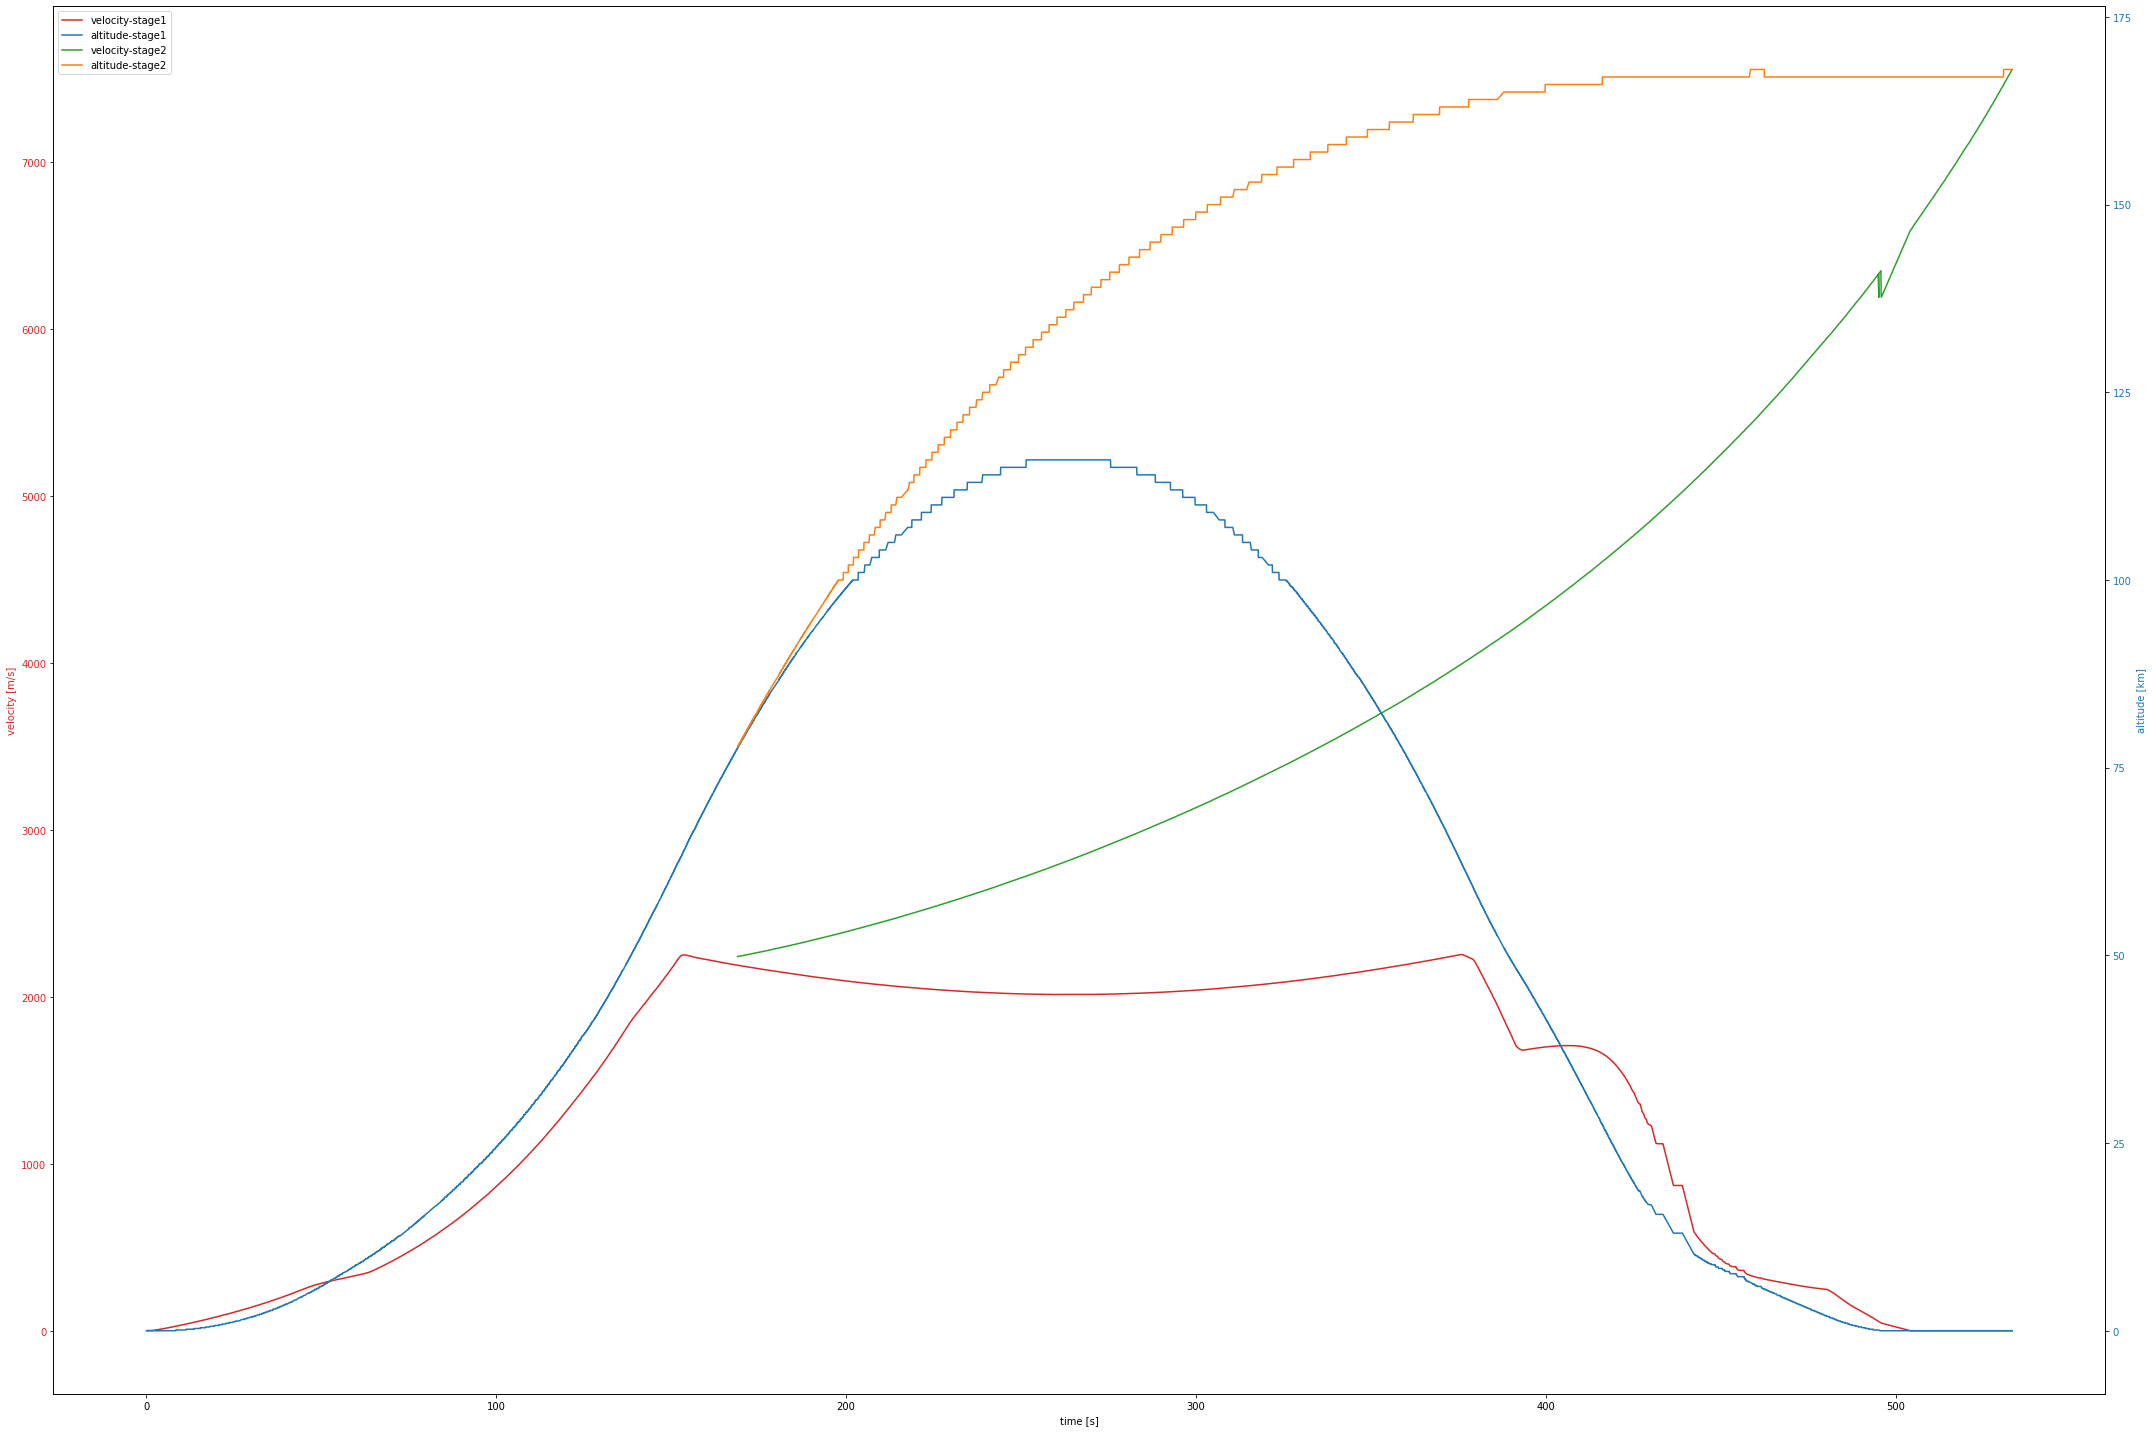

In [65]:
plt.rcParams['figure.figsize'] = [30, 20]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time [s]')
ax1.set_ylabel('velocity [m/s]', color=color)
v_s1 = ax1.plot(cleaned['time'], cleaned['velocity-stage1'], color='tab:red', label='velocity-stage1')
v_s2 = ax1.plot(stage2_df['time'], stage2_df['velocity-stage2'], color='tab:green', label='velocity-stage2')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('altitude [km]', color=color)  # we already handled the x-label with ax1
alt_s1 = ax2.plot(cleaned['time'], cleaned['altitude-stage1'], color='tab:blue', label='altitude-stage1')
alt_s2 = ax2.plot(stage2_df['time'], stage2_df['altitude-stage2'], color='tab:orange', label='altitude-stage2')
ax2.tick_params(axis='y', labelcolor=color)

# added these three lines
lns = v_s1 + alt_s1 + v_s2 + alt_s2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
# ax2.legend([alt_s1, alt_s2], ['altitude-stage1', 'altitude-stage2'])


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()